<a href="https://colab.research.google.com/github/mdanishshaikh/colab_notebooks/blob/master/Copy_of_VGG19_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from glob import glob
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path='/content/drive/MyDrive/Traininglab'
test_path='/content/drive/MyDrive/Testinglab'
val_path='/content/drive/MyDrive/Valid'

In [ ]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):
 
        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)
       
        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)
x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 1120 images belonging to 7 classes.
Found 280 images belonging to 7 classes.
Found 73 images belonging to 7 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [ ]:
from tensorflow.keras.applications import VGG19
import tensorflow as tf
tf.keras.applications.vgg19.preprocess_input

<function keras.applications.vgg19.preprocess_input>

In [ ]:
IMAGE_SIZE= [224, 224]

In [ ]:
vgg = VGG19(input_shape=IMAGE_SIZE +[3] , weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Traininglab/*')
# our layers - you can add more if you want
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 81/100
35/35 [==============================] - 32s 911ms/step - loss: 2.2312e-04 - accuracy: 1.0000 - val_loss: 1.4926 - val_accuracy: 0.6036
Epoch 82/100
35/35 [==============================] - 31s 893ms/step - loss: 2.1552e-04 - accuracy: 1.0000 - val_loss: 1.5110 - val_accuracy: 0.6000
Epoch 83/100
35/35 [==============================] - 32s 901ms/step - loss: 2.1038e-04 - accuracy: 1.0000 - val_loss: 1.4700 - val_accuracy: 0.6036
Epoch 84/100
35/35 [==============================] - 31s 881ms/step - loss: 2.0392e-04 - accuracy: 1.0000 - val_loss: 1.5160 - val_accuracy: 0.6000
Epoch 85/100
35/35 [==============================] - 31s 878ms/step - loss: 1.9832e-04 - accuracy: 1.0000 - val_loss: 1.4956 - val_accuracy: 0.6036
Epoch 86/100
35/35 [==============================] - 31s 889ms/step - loss: 1.9249e-04 - accuracy: 1.0000 - val_loss: 1.5377 - val_accuracy: 0.5964
Epoch 87/100
35/35 [==============================] - 31s 871ms/step - loss: 1.8677e-04 - accuracy: 1.0000

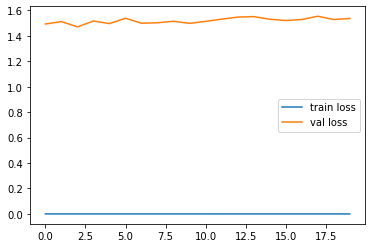

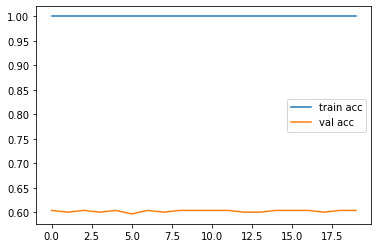

<Figure size 432x288 with 0 Axes>

In [ ]:
# fit the model
r = model.fit_generator(
     training_set, 
     validation_data=test_set, 
     epochs=100,initial_epoch=80, 
     steps_per_epoch=len(training_set), 
     validation_steps=len(test_set))

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.evaluate(test_x,test_y,batch_size=32)

9/9 [==============================] - 3s 330ms/step - loss: 7.0383 - accuracy: 0.0786


[7.038289546966553, 0.07857143133878708]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
accuracy_score(y_pred,test_y)

0.07857142857142857

In [ ]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.05      0.06      0.05        36
           1       0.42      0.14      0.21       119
           2       0.00      0.00      0.00        22
           3       0.03      0.05      0.03        22
           4       0.03      0.03      0.03        30
           5       0.00      0.00      0.00        29
           6       0.03      0.05      0.03        22

    accuracy                           0.08       280
   macro avg       0.08      0.05      0.05       280
weighted avg       0.19      0.08      0.11       280



In [ ]:
confusion_matrix(y_pred,test_y)

array([[ 2,  0,  4,  3,  1, 12, 14],
       [32, 17,  8, 13, 23,  7, 19],
       [ 1,  0,  0,  0,  0, 20,  1],
       [ 2,  0, 13,  1,  3,  0,  3],
       [ 0,  0,  4, 23,  1,  1,  1],
       [ 2, 23,  0,  0,  3,  0,  1],
       [ 1,  0, 11,  0,  9,  0,  1]])

In [ ]:
training_set.class_indices

{'INDIA100NEW': 0,
 'INDIA10NEW': 1,
 'INDIA20': 2,
 'INDIA200': 3,
 'INDIA2000': 4,
 'INDIA500': 5,
 'INDIA50NEW': 6}

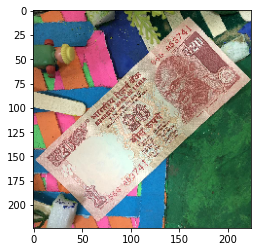

20


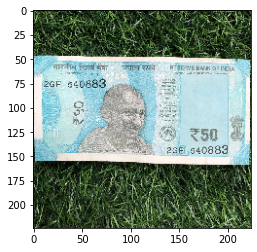

50


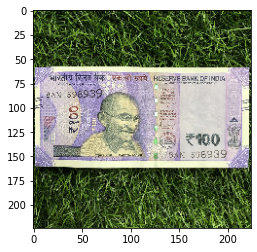

100


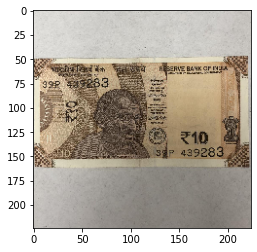

1o


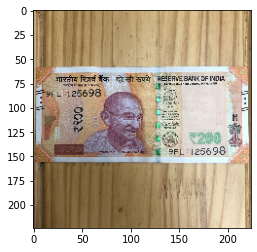

200


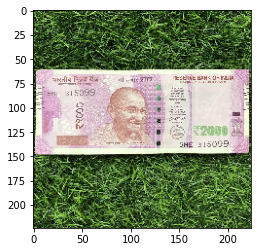

2000


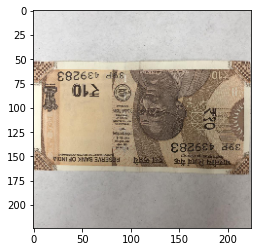

1o


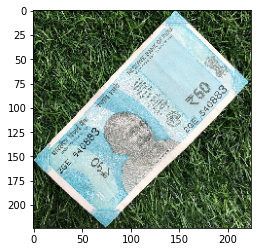

50


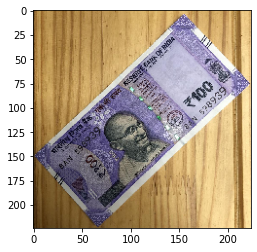

100


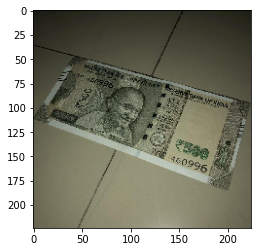

500


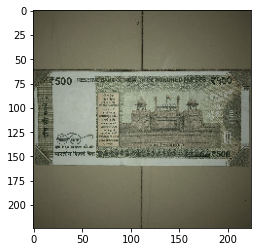

500


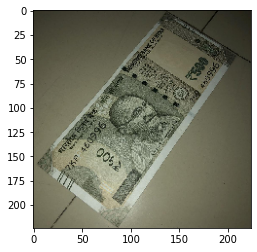

500


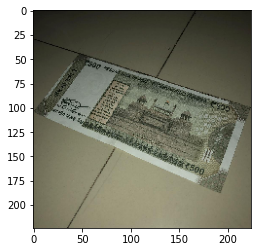

500


In [ ]:
path='/content/drive/MyDrive/Final'
for img in os.listdir(path):
    img=image.load_img(path+"/"+img,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images,batch_size=1) 
    if pred[0][0]>0.5:
        print("100")
    elif pred[0][1]>0.5:
        print("1o")
    elif pred[0][2]>0.5:
        print("20")
    elif pred[0][3]>0.5:
        print("200")
    elif pred[0][4]>0.5:
        print("2000")
    elif pred[0][5]>0.5:
        print("500")
    elif pred[0][6]>0.5:
        print("50")
    else:
        print("Not matching")


In [ ]:
model.save('vg19epoch100.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/vg19run1.h5')

In [ ]:
loaded_model.fit(train_x, train_y, epochs = 7, validation_data = (val_x,val_y),verbose=1)